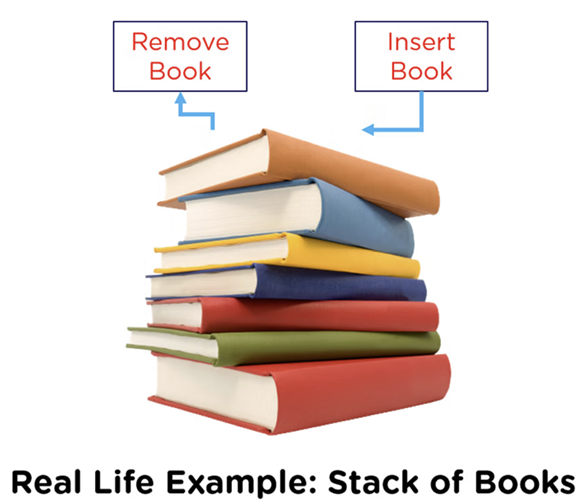

## Stack

##### **Primary vs. Secondary Data Structures**
- **Primary Data Structures** (e.g., arrays, linked lists) serve as the foundation for building more complex structures.
- **Secondary Data Structures** (e.g., stacks, queues) are created using primary structures.


**Stack** is an **adapter class** or **Secondary Data Structures**, meaning it is built on top of other data structures.

- The underlying structure for a stack could be:
  - An **array**
  - A **linked list**
  - A **vector**
  - An **ArrayList**
  

- Regardless of the type of the underlying data structure, a stack must implement the **same functionality.**

    - Follows the **Last In, First Out (LIFO**) principle.
    - Always operations are performed on the **top element**.
        - (1) Push: Add an element to the top. (Insert)
        - (2) Pop: Remove the top element. (Remove)
        - (3) Peek: View the top element without removing it. (GetElem(top))



- **Constant Time Operations**:
  - One requirement of a stack implementation is that the **push** and **pop** operations run in **constant time** (O(1)).
    -  The time taken for stack operations is **independent** of the size of the stack.

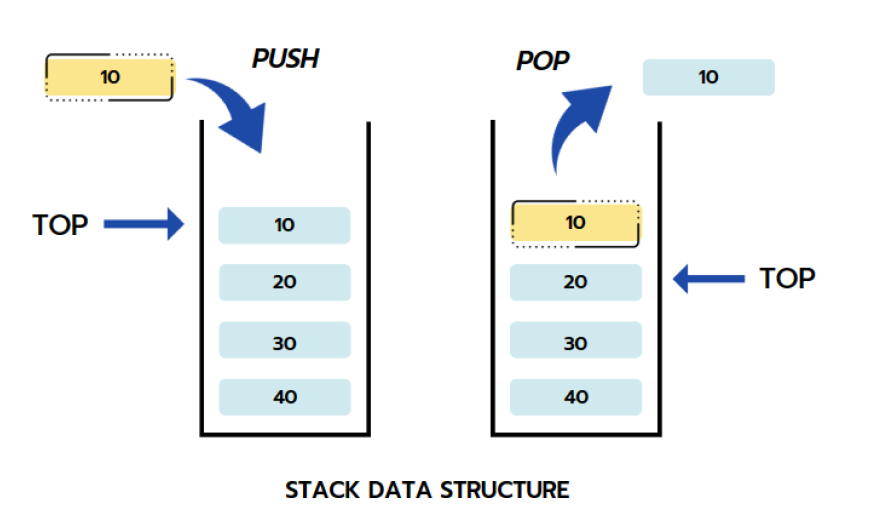

### Stack usage
- **Undo/Redo functionality** in text editors and applications (last action is undone first).
- **Browser history** navigation (back/forward through pages).
- **Balancing symbols** in compilers (matching parentheses, braces, etc.)
- **Expression evaluation** (infix to postfix conversion,  postfix to infix conversion, evaluating postfix expressions).
- **Memory management** in operating systems (storing local variables and function call information).

### Stack Types:
  - **Bounded Stack**:
    - Fixed size; capacity remains unchanged.
    - **Throws an exception (gives error)** if the stack exceeds the defined capacity.
    - Example: Array stack is a example of bounded stack. But it can be made unbounded by resizing it.
  - **Unbounded (Dynamic) Stack**:
    - Uses data stuctures with no fixed capacity, for example: list
    - For data stcutures with fixed capacity, for example, array **automatically doubles** the stack size when the capacity is reached, enabling dynamic resizing.
    - Example: **For dynamic stack-usually linkedlist** are used--because no initial capacity is needed to define it.

### Method Descriptions for Stack Interface:


- **`size(): int`**  
  - **Description**: Returns the number of items currently on the stack.  
  - **Return**: An integer representing the stack size.

- **`isEmpty():boolean`**  
  - **Description**: Checks if the stack is empty.  
  - **Return**: `true` if the stack is empty, otherwise `false`.

- **`push(element) throws StackOverflowException`**  
  - **Description**: Adds a new item (`element`) to the top of the stack.  
  - **Return**: No return value. Throws a `StackOverflowException` if the stack is full (for bounded stacks).

- **`pop() throws StackUnderflowException`**  
  - **Description**: Removes and returns the top item from the stack.  
  - **Return**: The item that was removed from the top of the stack. Throws a `StackUnderflowException` if the stack is empty.

- **`peek() throws StackUnderflowException`**  
  - **Description**: Returns the top item of the stack **without removing it.**  
  - **Return**: The top item of the stack. Throws a `StackUnderflowException` if the stack is empty.

- **`toString():String `** #----Optional, not part of exam
  - **Description**: Returns a **textual representation** of the stack, displaying the items from top to bottom.  
  - **Return**: A string representing the stack in the format `[ x y z ]`, where `x` is the top item and `z` is the bottom item.

- **`toArray():array`**  ----Optional, not part of exam
  - **Description**: Converts the stack into an array with the top item first and the bottom item last.  
  - **Return**: An array of objects representing the items in the stack, ordered from **top to bottom.**

### Array-based Stack Implementation [Code Not needed, optional, Theory needed]
- The **top of the stack** is always the last used slot in the array.
    - The **size-1 index** refers to the top element in the stack.
    - No separate field is required for the top element; it's derived from the size.
- No need to **shift array elements** since the stack operates at the end.
    - New items are added at the **end of the array** (top of the stack).
    - Items are **popped from the end** of the array (top of the stack).



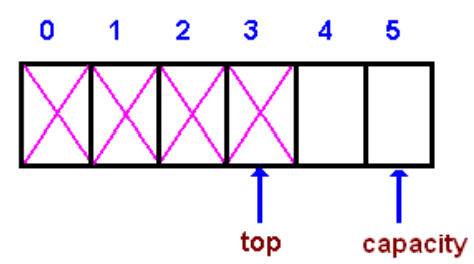

In [ ]:
import numpy as np

class ArrayStack:
    def __init__(self, capacity):
        self.stack = np.empty(capacity, dtype=object)  # Array to hold stack elements
        self.size = 0             # Tracks the number of elements in the stack

    def is_empty(self):
        return self.size == 0

    def is_full(self):
        return self.size == len(self.stack) # if the size is equal to the capacity or the array length

    def push(self, data): # insert at size
        if self.is_full():
            raise OverflowError("Stack overflow: Cannot push onto a full stack")
            # If dont understand raise--just print and return
            #print("Stack overflow: Cannot push onto a full stack")
            #return
        self.stack[self.size] = data
        self.size += 1

    def pop(self): # remove size-1=top
        if self.is_empty():
            raise IndexError("Stack underflow: Cannot pop from an empty stack")
            # If dont understand raise--just print and return
            #print("Stack underflow: Cannot pop from an empty stack")
            #return
        data = self.stack[self.size - 1]
        self.size -= 1
        return data

    def peek(self): # return data from size-1=top
        if self.is_empty():
            raise IndexError("Stack underflow: Cannot peek into an empty stack")
            # If dont understand raise--just print and return
        return self.stack[self.size - 1]

    def get_size(self):
        return self.size


    def toString(self):
        ans = "Stack (bottom -> top):"
        for i in range(0, self.size, 1):
            ans+=str(self.stack[i])+" "
        return ans


    def to_array(self):# ALWAYS TOP TO BOTTOM
        result = []
        # Start from the top of the stack and loop to the bottom
        for i in range(self.size - 1, -1, -1):
            result.append(self.stack[i])
        return np.array(result)  # Convert the list to a NumPy array

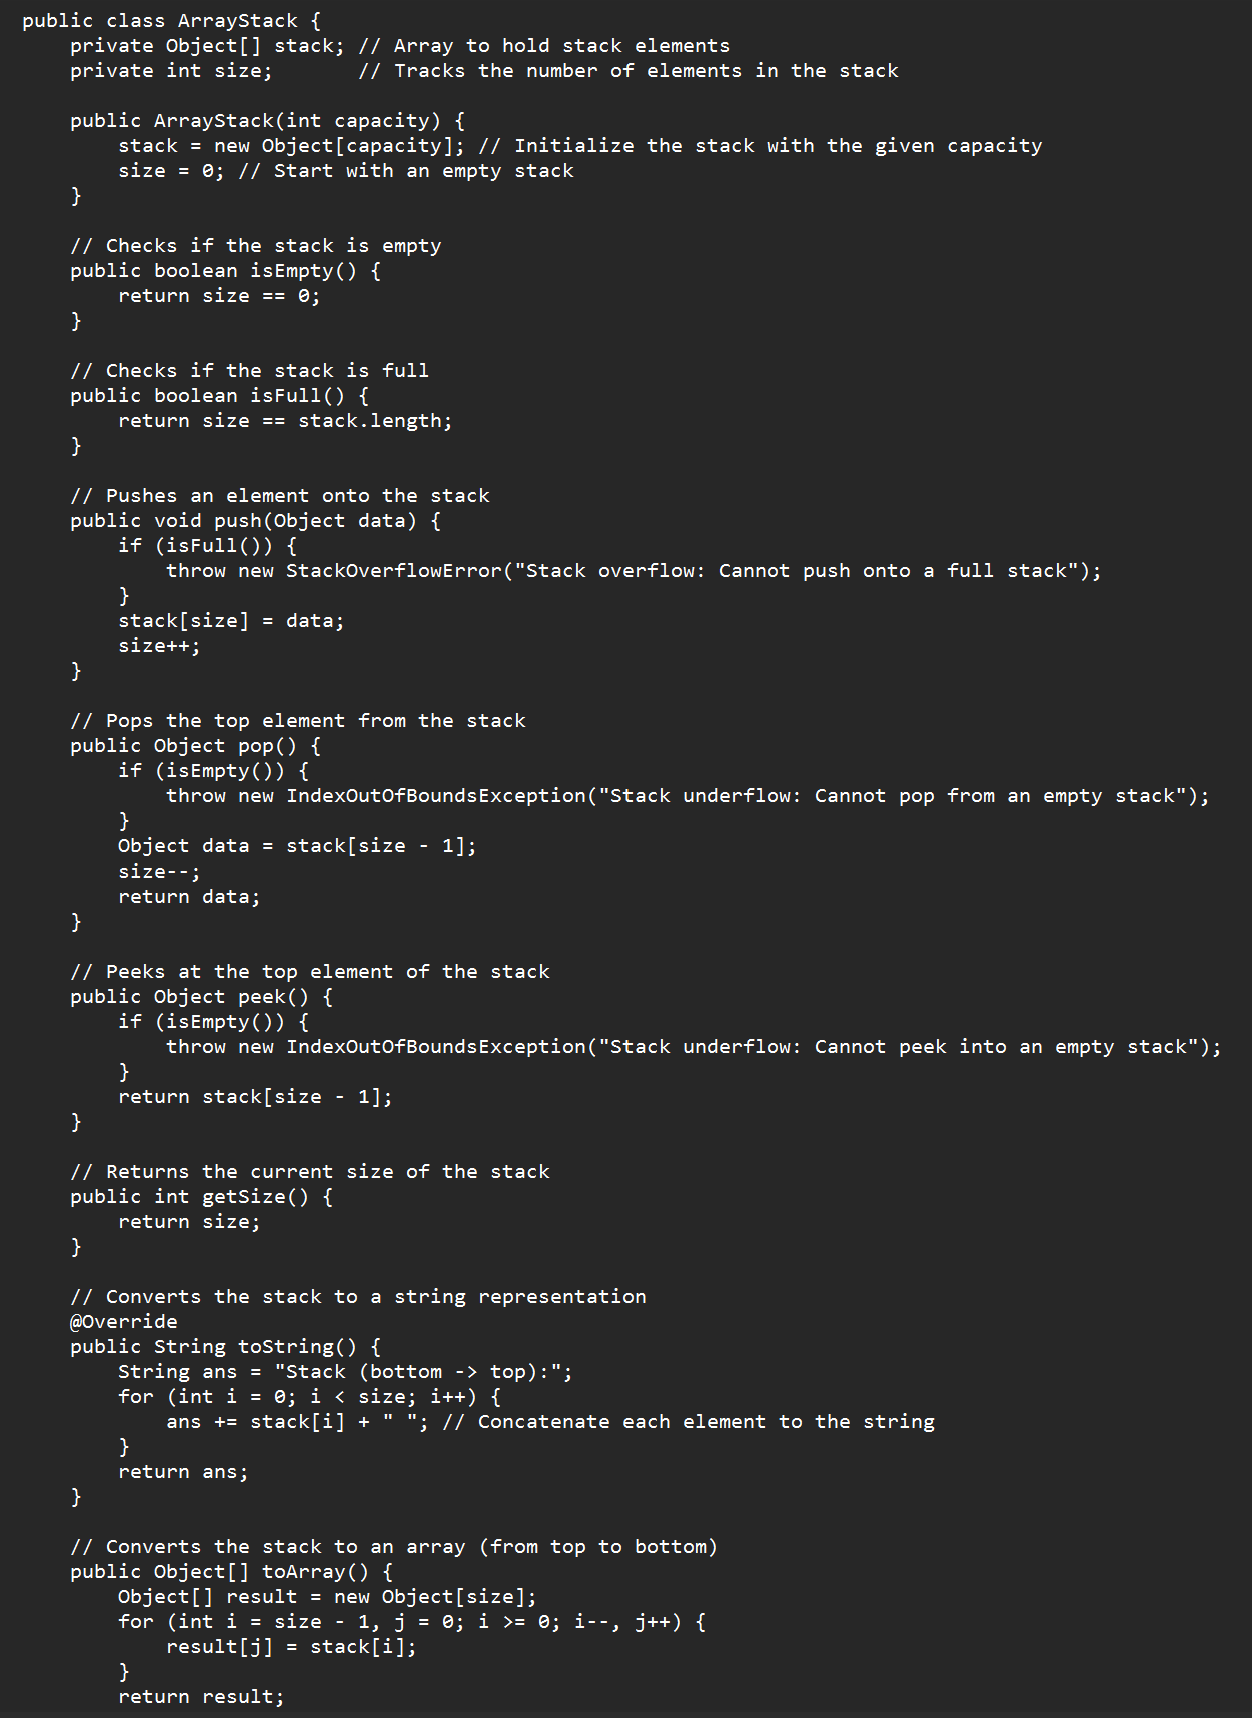

In [ ]:
# Example Usage
stack = ArrayStack(capacity=5)

# Pushing elements
stack.push(10)
stack.push(20)
stack.push(30)
print(stack.toString())  # Stack (bottom -> top): [10, 20, 30]
print("Size:", stack.get_size())  # Size: 3

# Converting stack to array (ALWAYS TOP TO BOTTOM)
stack_array = stack.to_array()
print("Stack as Array:", stack_array)  # Stack as Array: [30, 20, 10]

# Peeking
print("Peek:", stack.peek())  # Peek: 30

# Popping elements
print("Popped:", stack.pop())  # Popped: 30
print(stack.toString())                # Stack (bottom -> top): [10, 20]
print("Size:", stack.get_size())  # Size: 2

Stack (bottom -> top):10 20 30 
Size: 3
Stack as Array: [30 20 10]
Peek: 30
Popped: 30
Stack (bottom -> top):10 20 
Size: 2


In [ ]:
try:
    stack.push(40)
    print("pushed 40")
    print("Size:", stack.get_size())  # Size: 3
    print('-'*15)

    stack.push(50)
    print("pushed 50")
    print("Size:", stack.get_size())  # Size: 4
    print('-'*15)

    stack.push(60)
    print("pushed 60")
    print("Size:", stack.get_size())  # Size: 5
    print('-'*15)

    print("Trying to push 70:")
    stack.push(70)  # This will cause an OverflowError
    print("Size:", stack.get_size())  # Size: 6
except OverflowError as e:
    print(e)

pushed 40
Size: 3
---------------
pushed 50
Size: 4
---------------
pushed 60
Size: 5
---------------
Trying to push 70:
Stack overflow: Cannot push onto a full stack


In [ ]:
while not stack.is_empty(): # pop---till the stack is not empty
    print("Popped element from top: ", stack.pop())
try: # if it comes to this line---that means the stack is already empty
    stack.pop()  # This will cause an IndexError
except IndexError as e:
    print(e)

Popped element from top:  60
Popped element from top:  50
Popped element from top:  40
Popped element from top:  20
Popped element from top:  10
Stack underflow: Cannot pop from an empty stack


### Linked List-based Stack Implementation (non-dummy singly linear LL)

- **Best dynamic stack implementation** from an efficiency point of view.
- A **singly-linked list-based** stack allows for **dynamic resizing** without any overhead of resizing or copying data, making it **memory efficient**.
  
#### Why Push at the Beginning of the List?
- In a **singly linked list-based stack**, new items are pushed at the **beginning of the list** (head). [Prepend]
- **Reason**:
  - Inserting a new node at the beginning of the list allows the **push operation** to run in **constant time** (O(1)).
  - This operation only involves changing the pointer of the head node to the new node, without needing to traverse the list.
  
#### Why Pop from the Beginning of the List?
- **Pop** operation removes the item from the beginning (head) of the list, maintaining the **LIFO (Last In, First Out)** principle.
- This also runs in **constant time** (O(1)) as the head pointer is simply **moved to the next node**.


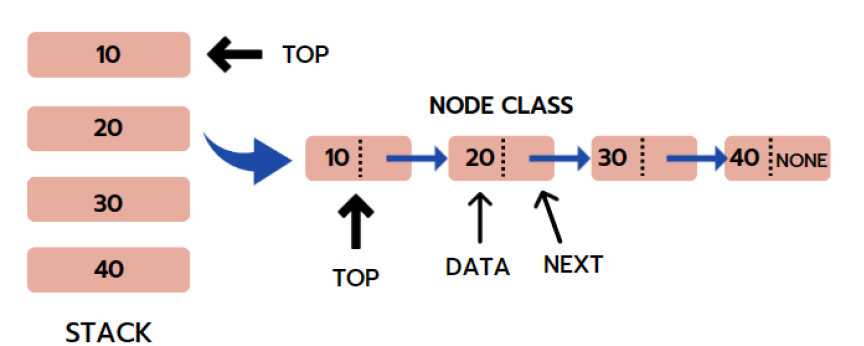

##### Stack representation using non-dummy singly linear linked list

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
##############################################################################

class ListStack:
    def __init__(self):
        self.top = None  # Represents the top of the stack--HEAD here
        self.size = 0    # Tracks the size of the stack

    def is_empty(self):
        return self.size == 0

    def push(self, data): # Prepend--head changes
        new_node = Node(data)
        new_node.next = self.top  # New node points to the current top
        self.top = new_node       # Update the top to the new node

        self.size += 1            # Increment size

    def pop(self): # remove top head--index 0--head changes
        if self.is_empty():
            raise IndexError("Underflow: Pop from empty stack")
        # If dont understand raise, throw--just print and return
        #print("Underflow: Pop from empty stack")
        #return
        popped_data = self.top.data  # Retrieve the data of the top node
        self.top = self.top.next     # Update the top to the next node
        self.size -= 1               # Decrement size
        return popped_data

    def peek(self):
        if self.is_empty():
            raise IndexError("Underflow: Peek from empty stack")
        return self.top.data

    def get_size(self):
        return self.size

    def to_array(self): # same code as print FW of L2-L3
        print("Stack (top -> bottom):", end="")
        current = self.top
        elements = []
        while current!= None: # Top to bottom
            elements.append(current.data)
            current = current.next
        #print("Stack (top -> bottom):", elements)
        return elements

    def toString(self):
        current = self.top
        ans = "Stack (bottom -> top):"
        while current!= None: # Top to bottom
            ans+=(" "+ str(current.data))
            current = current.next
        return ans

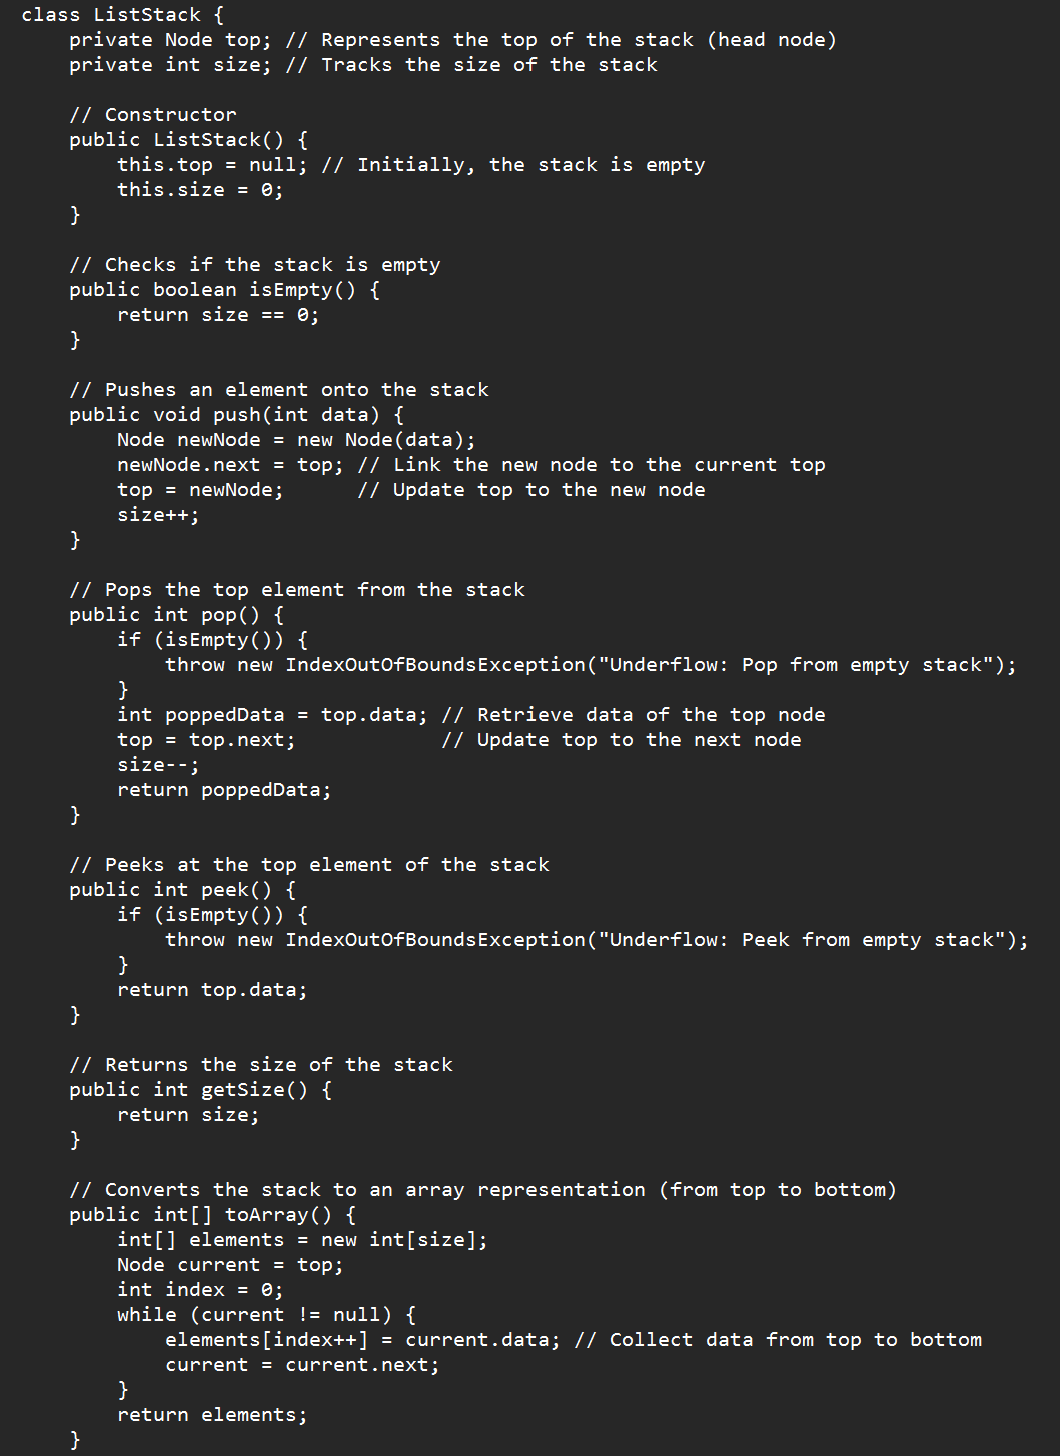

In [ ]:
# Example Usage
stack = ListStack()

# Pushing elements
stack.push(10)
stack.push(20)
stack.push(30)
stack.push(40)
# top:40, 30, 20, 10
print(stack.to_array())  # Stack (top -> bottom): [40, 30, 20, 10]
print("Size:", stack.get_size())  # Size: 4

# Peeking
print("Peek:", stack.peek())  # Peek: 40

# Popping elements
print("Popped:", stack.pop())  # Popped: 40
print(stack.to_array())                # Stack (top -> bottom): [30, 20, 10]
print("Size:", stack.get_size())  # Size: 3
print("Is empty:", stack.is_empty())  # Is empty: False

# Clearing stack
while not stack.is_empty(): # 30, 20, 10
    print("Popped element from top: ", stack.pop())

print("Is empty:", stack.is_empty())  # Is empty: True
print("Size:", stack.get_size())      # Size: 0

Stack (top -> bottom):[40, 30, 20, 10]
Size: 4
Peek: 40
Popped: 40
Stack (top -> bottom):[30, 20, 10]
Size: 3
Is empty: False
Popped element from top:  30
Popped element from top:  20
Popped element from top:  10
Is empty: True
Size: 0


In [ ]:
## Uncomment individual lines to see the errors
#print("Peek:", stack.peek())  # Error--empty stack--Underflow

In [ ]:
## Uncomment individual lines to see the errors
#print("Popped:", stack.pop())  # Error--empty stack--Underflow

## Reverse a Word Using Stack

**Concept**:  
You push a given word onto the stack, letter by letter, and then pop letters from the stack to reverse the word.

**Algorithm**:  
1. Begin with an empty stack and an input stream.
2. **Push Phase**:
   - While there are characters to read:
     - Read the next input character.
     - Push it onto the stack.
3. **Pop Phase**:
   - While the stack is not empty:
     - Pop a character from the stack.
     - Print the character.

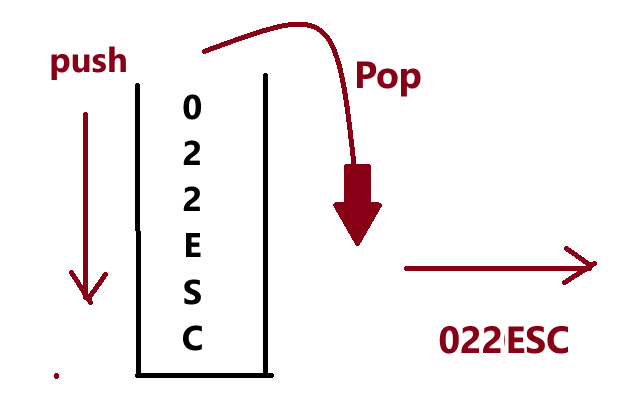

In [ ]:
def reverse_word(word):
    stack = ListStack()

    # Push each character onto the stack
    for char in word:
        stack.push(char)

    # Pop characters to reverse the word
    reversed_word = ""
    while not stack.is_empty():
        reversed_word = reversed_word + stack.pop()

    return reversed_word

# Example usage
word = "hello"
print("Original word:", word)
print("Reversed word:", reverse_word(word))
print('-'*20)

# Example usage
word = "CSE220"
print("Original word:", word)
print("Reversed word:", reverse_word(word))

Original word: hello
Reversed word: olleh
--------------------
Original word: CSE220
Reversed word: 022ESC


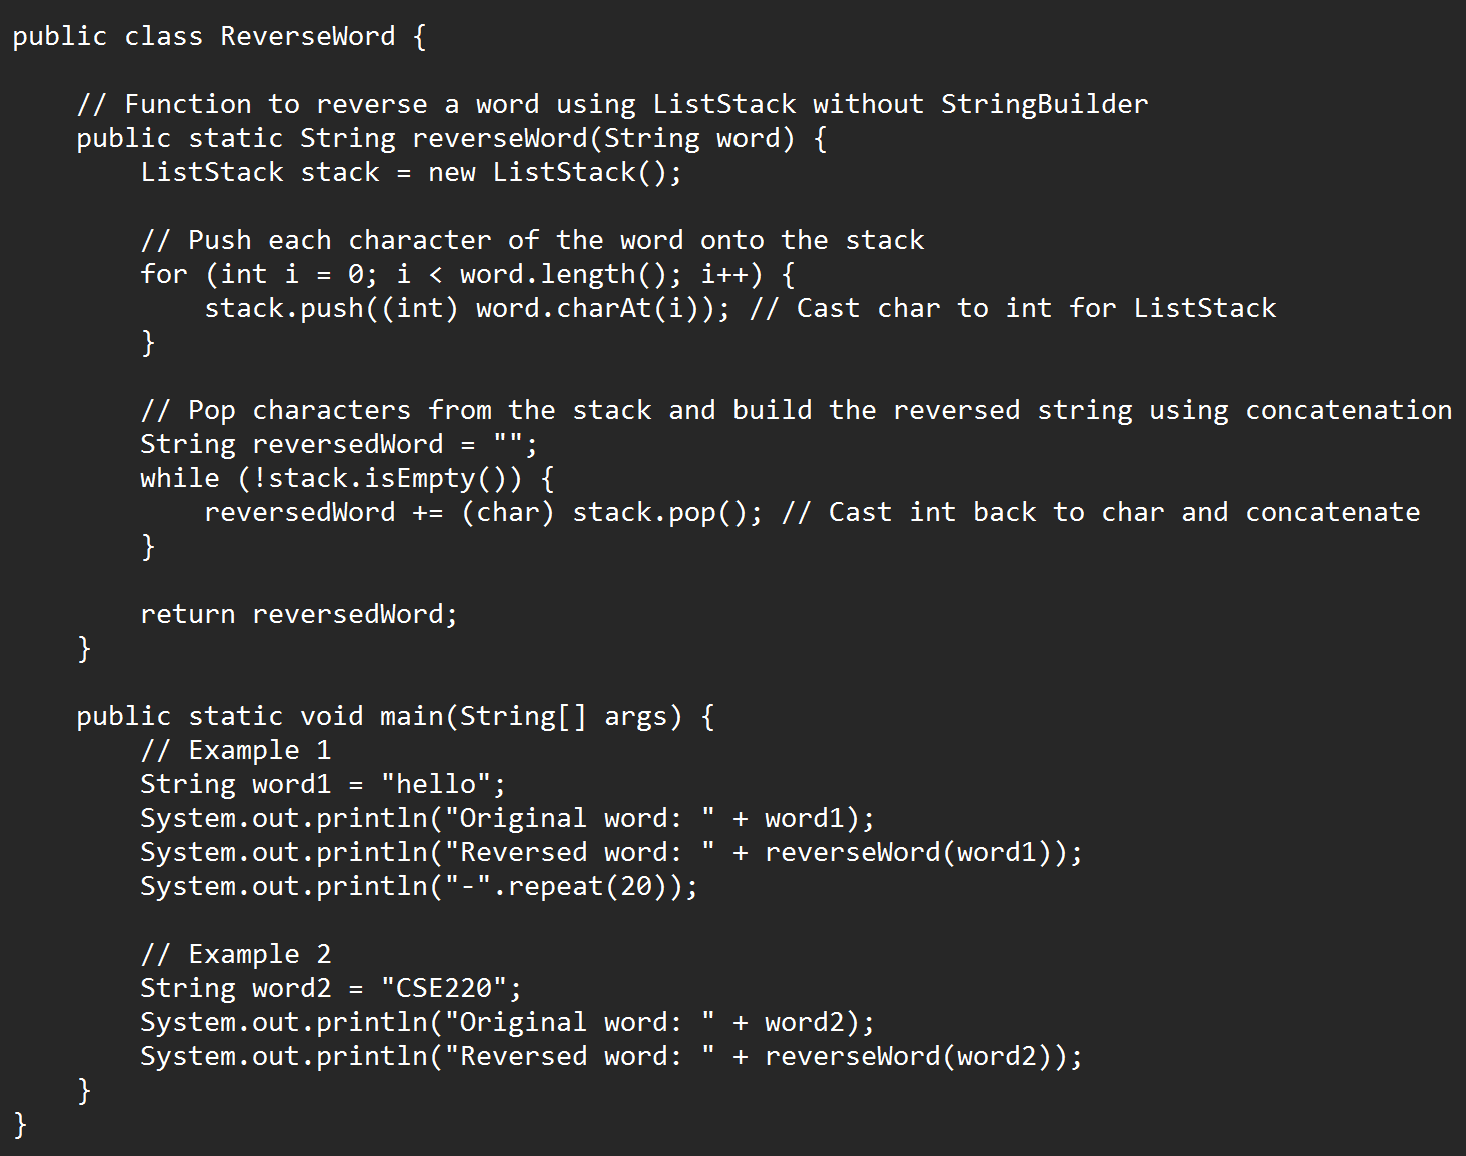

## Parenthesis Balancing Using Stack

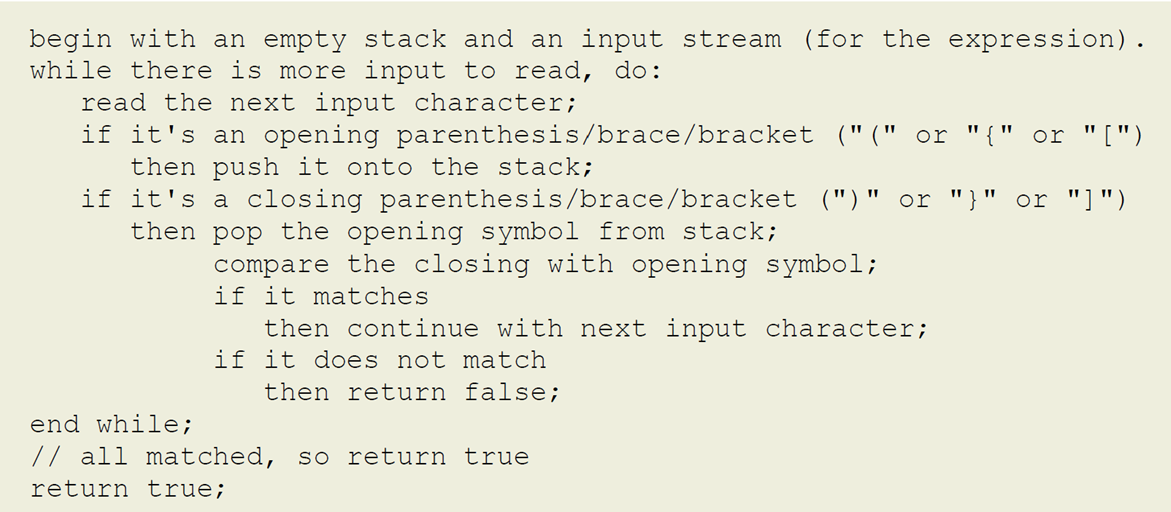

In [ ]:
def check_balanced_parentheses(expression):
    stack = ListStack()  # Initialize a stack to hold opening brackets

    for current_char in expression:
        # Push opening brackets onto the stack
        if current_char in "({[":
            stack.push(current_char)
        # Check matching pairs for closing brackets
        elif current_char in ")}]":
            if stack.is_empty():
                print("Error: Extra closing bracket found")
                return
            last_opening = stack.pop()
            if (last_opening == '(' and current_char != ')') or \
               (last_opening == '{' and current_char != '}') or \
               (last_opening == '[' and current_char != ']'):
                print("Error: Mismatched brackets")
                return

    # If the stack is empty, all brackets were matched correctly
    if stack.is_empty():
        print("Ok 👍: Expression is balanced")
    else:
        print("Error: Extra opening brackets left")

In [ ]:
# Example 0: Incorrectly balanced expression
expression_0 = "2 * (3 + 4)}]"
print(f"Checking: {expression_0}")
check_balanced_parentheses(expression_0)
print('-'*50)

# Example 1: Correctly balanced expression
expression_1 = "[3 + {2 * (3 + 4)}]"
print(f"Checking: {expression_1}")
check_balanced_parentheses(expression_1)
print('-'*50)

# Example 2: Incorrectly balanced expression
expression_2 = "[3 + {2 * (3 + 4)]}"
print(f"\nChecking: {expression_2}")
check_balanced_parentheses(expression_2)
print('-'*50)

Checking: 2 * (3 + 4)}]
Error: Extra closing bracket found
--------------------------------------------------
Checking: [3 + {2 * (3 + 4)}]
Ok 👍: Expression is balanced
--------------------------------------------------

Checking: [3 + {2 * (3 + 4)]}
Error: Mismatched brackets
--------------------------------------------------


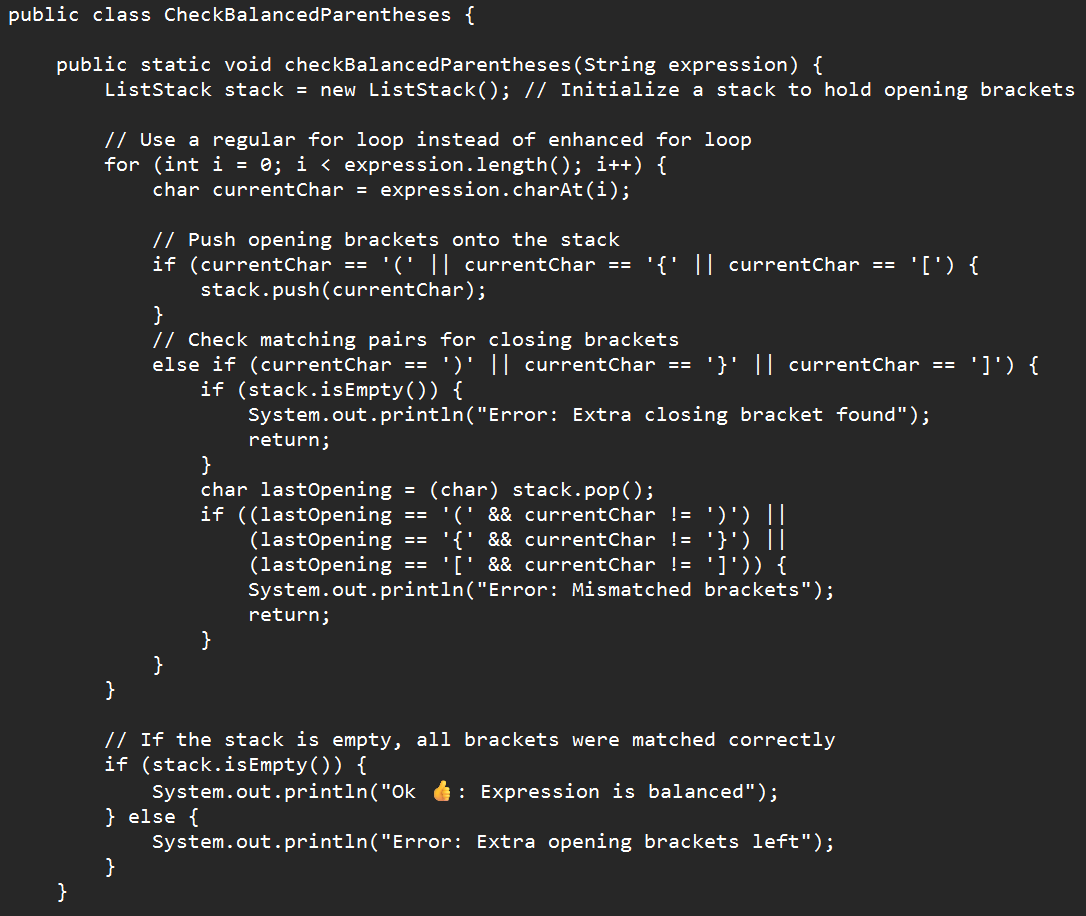

## Postfix Expression Evaluation

**Postfix (Reverse Polish Notation)**:
  - Postfix eliminates the need for parentheses and precedence rules.
  - Example:
    - Infix: `3 + 5 * 9`
    - Postfix: `3 5 9 * +`
  - More complex example:
    - Infix: `((3 + 2) * 4) / (5 - 1)`
    - Postfix: `3 2 + 4 * 5 1 - /`

### Using a Stack for Post-fix Evaluation

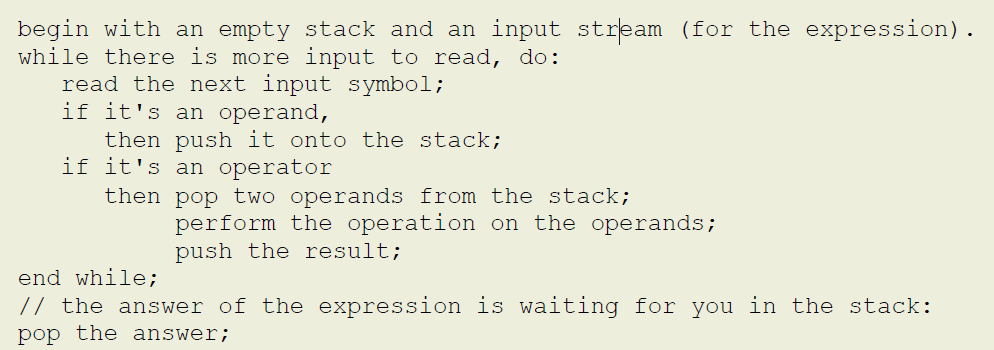

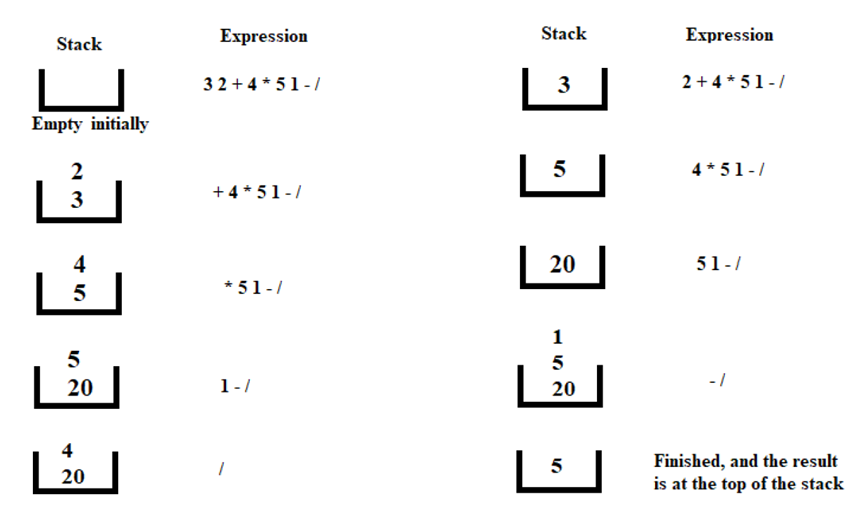

| (B)Stack(Top)  | Expression Remaining  |
|-------------|------------------------|
| (empty)     | 3 2 + 4 * 5 1 - /     |
| 3           | 2 + 4 * 5 1 - /       |
| 3, 2        | + 4 * 5 1 - /         |
| 5           | 4 * 5 1 - /           |
| 5, 4        | * 5 1 - /             |
| 20          | 5 1 - /               |
| 20, 5       | 1 - /                 |
| 20, 5, 1    | - /                   |
| 20, 4       | /                     |
| 5           | (finished, result on top) |


In [ ]:
def evaluate_postfix(expression):
    stack = ListStack()  # Use ListStack to manage operands
    current_number = ""

    # Loop through each character in the postfix expression
    for char in expression:
        if char.isdigit():  # Check if the character is a digit
            current_number += char  # Build the number
        elif char.isspace():  # Check for a space (delimiter)
            if current_number:  # If there's a number, push it to the stack
                stack.push(int(current_number))
                current_number = ""  # Reset for the next number
        elif char in ['+', '-', '*', '/']:  # Operator (+, -, *, /)
            # Pop the two operands
            operand2 = stack.pop()
            operand1 = stack.pop()

            # Perform the operation
            if char == '+':
                result = operand1 + operand2
            elif char == '-':
                result = operand1 - operand2
            elif char == '*':
                result = operand1 * operand2
            elif char == '/':
                result = operand1 / operand2

            # Push the result back onto the stack
            stack.push(result)

    # If there's a number left, push it to the stack
    if current_number:
        stack.push(int(current_number))

    # The result is the last item remaining in the stack
    return stack.pop()

In [ ]:
# Example usage

postfix_expression = "3 5 9 * +"
infix_expression = 3 + 5 * 9
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)

postfix_expression = "30 10 9 * +"
infix_expression = 30 + 10 * 9
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)

postfix_expression = "3 2 + 4 * 5 1 - /"
infix_expression = ((3 + 2) * 4) / (5 - 1)
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)


postfix_expression = "3 4 * 2 5 * +"
infix_expression = (3 * 4) + (2 * 5)
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)

postfix_expression = "2 3 - 4 + 5 6 7 * + *"
infix_expression = ((2 - 3) + 4) * (5 + (6 * 7))
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)

postfix_expression = "10 30 - 40 + 5 6 7 * + *"
infix_expression = ((10 - 30) + 40) * (5 + (6 * 7))
result = evaluate_postfix(postfix_expression)
print("postfix evaluation result:", result)
print("infix result:", infix_expression)
print('-'*20)

postfix evaluation result: 48
infix result: 48
--------------------
postfix evaluation result: 120
infix result: 120
--------------------
postfix evaluation result: 5.0
infix result: 5.0
--------------------
postfix evaluation result: 22
infix result: 22
--------------------
postfix evaluation result: 141
infix result: 141
--------------------
postfix evaluation result: 940
infix result: 940
--------------------


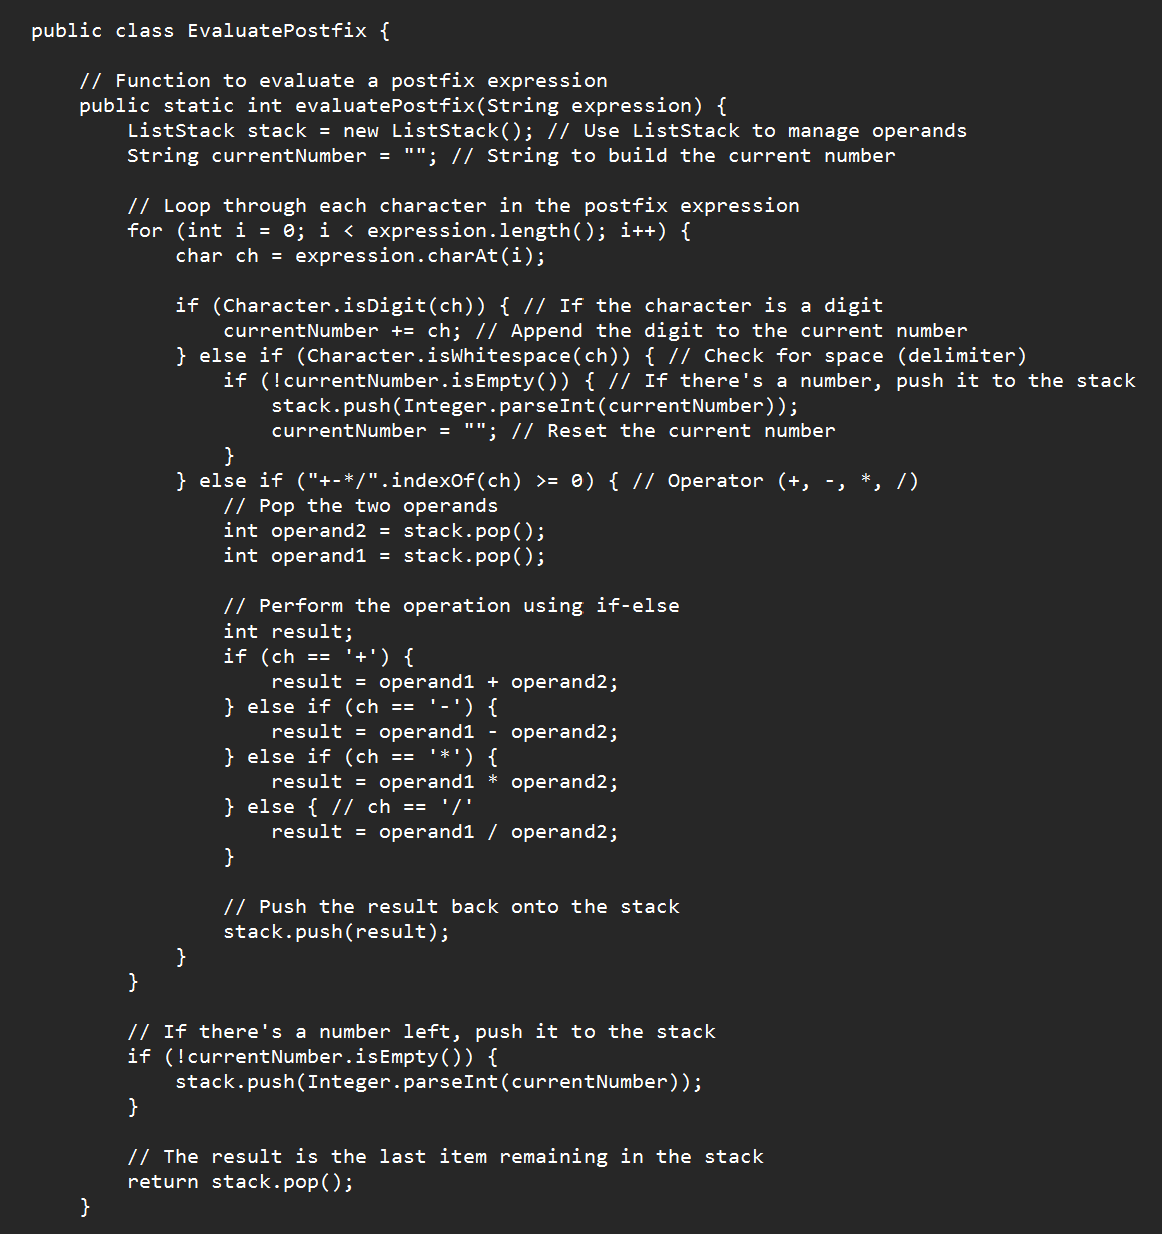

## **Infix to Postfix** using Stack -- (Optional/ Not needed)

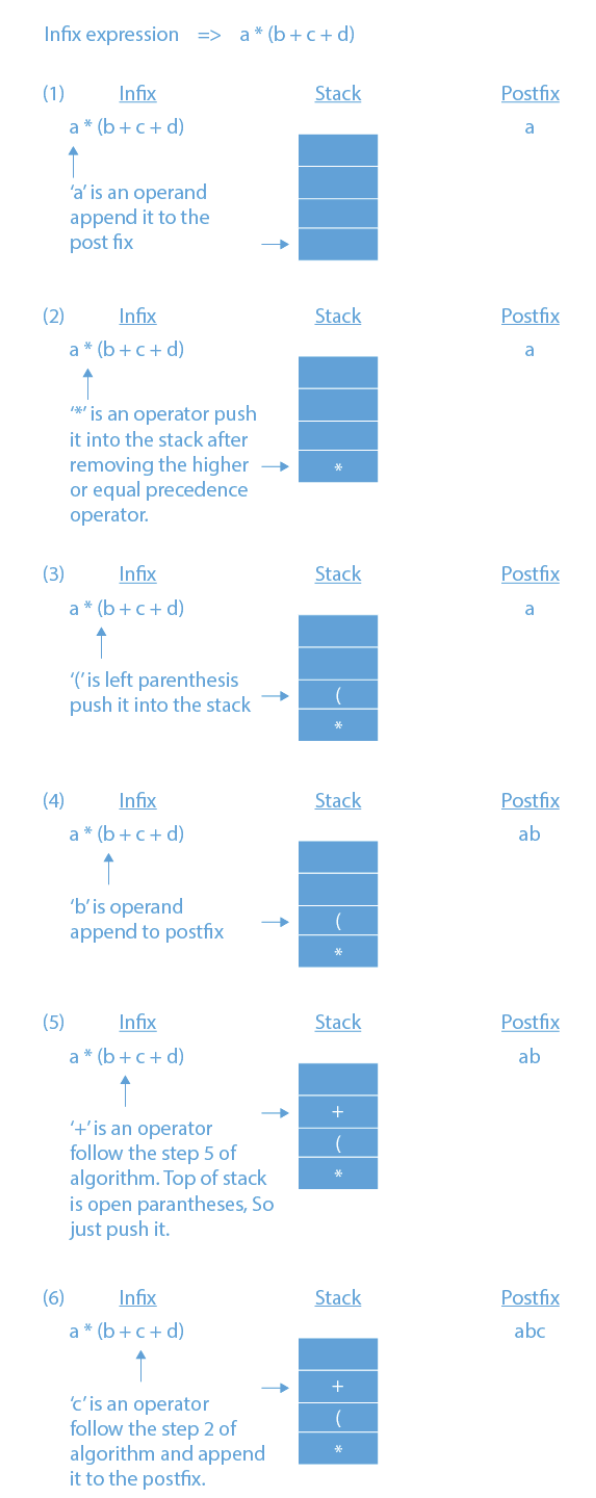

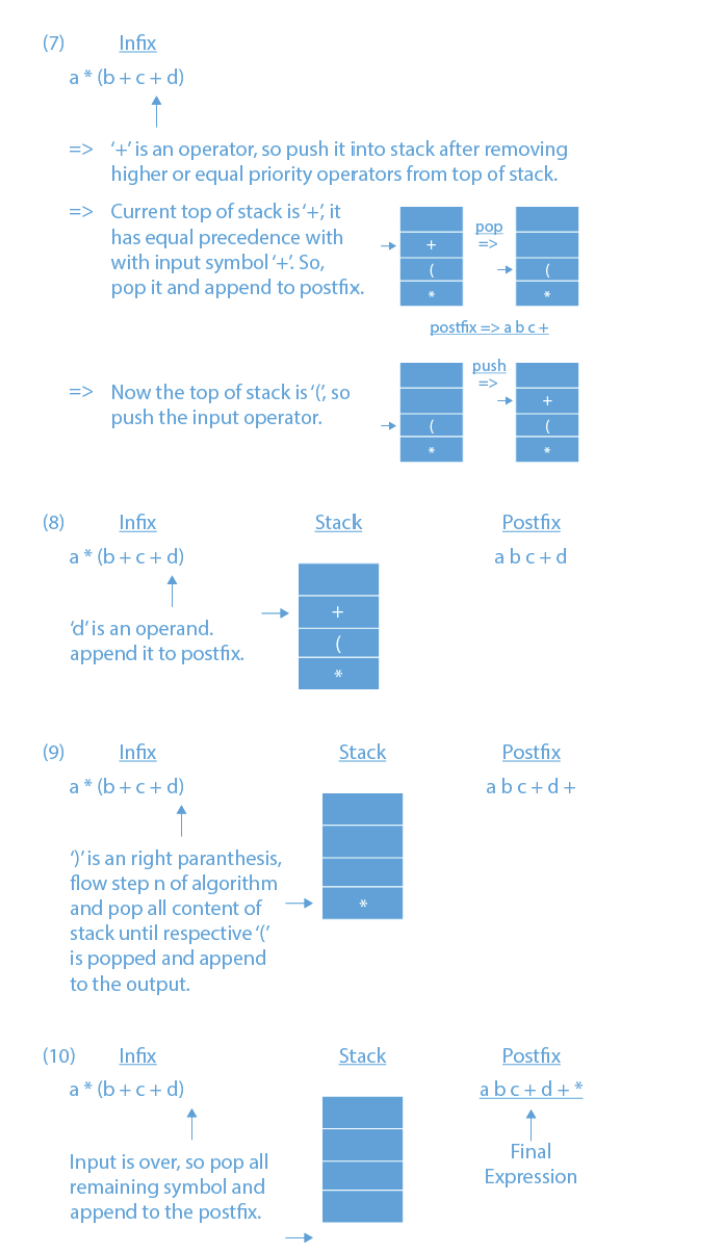


Visualistion link:
- (see this) https://www.prepbytes.com/blog/stacks/infix-to-postfix-conversion-using-stack/

- https://www.geeksforgeeks.org/convert-infix-expression-to-postfix-expression/

### Infix to Postfix Conversion Algorithm

1. **Initialize**:
   - Create an empty stack for operators.
   - Create an empty list for the postfix expression.

2. **Scan the symbols one by one** from left to right in the given infix expression:
   - **If the symbol is an operand (i.e., a number or variable)**:
     - Append it directly to the postfix expression.
     
   - **If the symbol is a left parenthesis `(`**:
     - Push it onto the stack.
     
   - **If the symbol is a right parenthesis `)`**:
     - Pop all the operators from the stack and append them to the postfix expression until a left parenthesis `(` is popped.
     - Discard the left parenthesis.

   - **If the symbol is an operator (`+`, `-`, `*`, `/`)**:
     - While there is an operator on the stack with **higher or equal precedence** than the current operator:
       - Pop the operator from the stack and append it to the postfix expression.
     - If the stack is empty or the operator on the stack has **lower precedence**, **push** the current operator onto the stack.
     - If there is a left parenthesis, `(` on top of the stack, push the current operator onto the stack.

3. **After the input is over**:
   - Pop all the remaining operators from the stack and append them to the postfix expression.

### Precedence of Operators:
   - Operators have precedence such that `*` and `/` have higher precedence than `+` and `-`.
   - When an operator with equal precedence is encountered, associativity decides the order (typically left-to-right).

In [ ]:
# Function to define precedence of operators
def precedence(op):
    if op in ('+', '-'):
        return 1
    if op in ('*', '/'):
        return 2
    if op == '^':  # Exponentiation
        return 3
    return 0

In [ ]:
# Function to check if a character is alphanumeric using ASCII values
def is_alnum_ascii(char):
    ascii_val = ord(char)
    # Check for digits (0-9) or letters (A-Z, a-z)
    return (ord('0') <= ascii_val <= ord('9')) or (ord('A') <= ascii_val <= ord("Z")) or (ord('a') <= ascii_val <= ord('z'))

In [ ]:
# Function to convert infix to postfix
def infix_to_postfix(expression):
    stack = ListStack()  # Stack to hold operators
    postfix = []         # List to build the postfix expression

    for char in expression:
        # If the character is an operand, add it to the output
        if char.isalnum():  # Handles letters and numbers
            postfix.append(char)
        # If the character is an opening parenthesis, push it onto the stack
        elif char == '(':
            stack.push(char)
        # If the character is a closing parenthesis, pop until '('
        elif char == ')':
            while not stack.is_empty() and stack.peek() != '(':
                postfix.append(stack.pop())
            stack.pop()  # Discard the '('
        # If the character is an operator
        else:
            while (not stack.is_empty() and precedence(stack.peek()) >= precedence(char)):
                postfix.append(stack.pop())
            stack.push(char)

    # Pop all the remaining operators in the stack
    while not stack.is_empty():
        postfix.append(stack.pop())

    # Building the post-fix expression
    result_postfix = ""
    for char in postfix:
        result_postfix += char
    return result_postfix

In [ ]:
# Example Usage
infix_expr_1 = "A*(B+C+D)" # From the website
print(f"Infix: {infix_expr_1} -> Postfix: {infix_to_postfix(infix_expr_1)}")

Infix: A*(B+C+D) -> Postfix: ABC+D+*


##### Explanation for Infix to Postfix Conversion:

### For `A * (B + C - (D + E / F))`:

1. **Read `A`**: Add to the postfix expression → `postfix = A`.
2. **Read `*`**: Push onto the stack → `stack = ['*']`.
3. **Read `(`**: Push onto the stack → `stack = ['*', '(']`.
4. **Read `B`**: Add to the postfix expression → `postfix = AB`.
5. **Read `+`**: Push onto the stack → `stack = ['*', '(', '+']`.
6. **Read `C`**: Add to the postfix expression → `postfix = ABC`.
7. **Read `-`**: Pop `+` from the stack and add it to the postfix expression, then push `-` → `postfix = ABC+`, `stack = ['*', '(', '-']`.
8. **Read `(`**: Push onto the stack → `stack = ['*', '(', '-', '(']`.
9. **Read `D`**: Add to the postfix expression → `postfix = ABC+D`.
10. **Read `+`**: Push onto the stack → `stack = ['*', '(', '-', '(', '+']`.
11. **Read `E`**: Add to the postfix expression → `postfix = ABC+DE`.
12. **Read `/`**: Push onto the stack → `stack = ['*', '(', '-', '(', '+', '/']`.
13. **Read `F`**: Add to the postfix expression → `postfix = ABC+DEF`.
14. **Pop until `(`**: Pop `/` and `+` from the stack and add them to the postfix expression → `postfix = ABC+DEF/+`, `stack = ['*', '(', '-']`.
15. **Pop until `(`**: Pop `-` from the stack and add it to the postfix expression → `postfix = ABC+DEF/+ -`, `stack = ['*']`.
16. **Pop remaining operators**: Pop `*` from the stack and add it to the postfix expression → `postfix = ABC+DEF/+ - *`.

**Postfix Expression:** `ABC+DEF/+ - *`

---

In [ ]:
# Example Usage
infix_expr_1 = "A*(B+C-(D+E/F))"
print(f"Infix: {infix_expr_1} -> Postfix: {infix_to_postfix(infix_expr_1)}")

Infix: A*(B+C-(D+E/F)) -> Postfix: ABC+DEF/+-*


### For `((A + B) - C * (D / E)) + F`:

1. **Read `(`**: Push onto the stack → `stack = ['(']`.
2. **Read `(`**: Push onto the stack → `stack = ['(', '(']`.
3. **Read `A`**: Add to the postfix expression → `postfix = A`.
4. **Read `+`**: Push onto the stack → `stack = ['(', '(', '+']`.
5. **Read `B`**: Add to the postfix expression → `postfix = AB`.
6. **Read `)`**: Pop `+` from the stack and add it to the postfix expression, then pop `(` → `postfix = AB+`, `stack = ['(']`.
7. **Read `-`**: Push onto the stack → `stack = ['(', '-']`.
8. **Read `C`**: Add to the postfix expression → `postfix = AB+C`.
9. **Read `*`**: Push onto the stack → `stack = ['(', '-', '*']`.
10. **Read `(`**: Push onto the stack → `stack = ['(', '-', '*', '(']`.
11. **Read `D`**: Add to the postfix expression → `postfix = AB+CD`.
12. **Read `/`**: Push onto the stack → `stack = ['(', '-', '*', '(', '/']`.
13. **Read `E`**: Add to the postfix expression → `postfix = AB+CDE`.
14. **Read `)`**: Pop `/` from the stack and add it to the postfix expression, then pop `(` → `postfix = AB+CDE/`, `stack = ['(', '-', '*']`.
15. **Pop until `(`** : Pop `*` and `-` from the stack and add them to the postfix expression → `postfix = AB+CDE/*-`.
16. **Read `+`**: Push onto the stack → `stack = ['+']`.
17. **Read `F`**: Add to the postfix expression → `postfix = AB+CDE/*-F`.
18. **Pop remaining operators**: Pop `+` from the stack and add it to the postfix expression → `postfix = AB+CDE/*-F+`.

**Postfix Expression:** `AB+CDE/*-F+`

In [ ]:
# Example Usage
infix_expr_1 = "((A+B)-C*(D/E))+F"
print(f"Infix: {infix_expr_1} -> Postfix: {infix_to_postfix(infix_expr_1)}")

Infix: ((A+B)-C*(D/E))+F -> Postfix: AB+CDE/*-F+


##### Explanation for Infix to Postfix Conversion:

##### For `A+B*C`:
1. **Read `A`**: Add to the postfix expression → `postfix = A`.
2. **Read `+`**: Push onto the stack → `stack = ['+']`.
3. **Read `B`**: Add to the postfix expression → `postfix = AB`.
4. **Read `*`**: Since `*` has higher precedence than `+`, push it onto the stack → `stack = ['+', '*']`.
5. **Read `C`**: Add to the postfix expression → `postfix = ABC`.
6. **Pop operators from the stack**: Pop `*` from the stack and add it to the postfix expression → `postfix = ABC*`.
7. **Pop remaining operators**: Pop `+` from the stack and add it to the postfix expression → `postfix = ABC*+`.




In [ ]:
# Example Usage
infix_expr_1 = "A+B*C"
print(f"Infix: {infix_expr_1} -> Postfix: {infix_to_postfix(infix_expr_1)}")

Infix: A+B*C -> Postfix: ABC*+


##### For `(A+B)*C`:
1. **Read `(`**: Push onto the stack → `stack = ['(']`.
2. **Read `A`**: Add to the postfix expression → `postfix = A`.
3. **Read `+`**: Push onto the stack → `stack = ['(', '+']`.
4. **Read `B`**: Add to the postfix expression → `postfix = AB`.
5. **Read `)`**: Pop until `(` → `postfix = AB+`, `stack = []`.
6. **Read `*`**: Push onto the stack → `stack = ['*']`.
7. **Read `C`**: Add to the postfix expression → `postfix = AB+C`.
8. **Pop remaining operators**: Pop `*` from the stack and add it to the postfix expression → `postfix = AB+C*`.

This approach handles operands and operators with proper precedence and parentheses.

In [ ]:
# Example Usage
infix_expr_2 = "(A+B)*C"
print(f"Infix: {infix_expr_2} -> Postfix: {infix_to_postfix(infix_expr_2)}")

Infix: (A+B)*C -> Postfix: AB+C*


##### Explanation for Numeric Operands:

###### For `2+3*4`:
1. **Read `2`**: Add to the postfix expression → `postfix = 2`.
2. **Read `+`**: Push onto the stack → `stack = ['+']`.
3. **Read `3`**: Add to the postfix expression → `postfix = 23`.
4. **Read `*`**: Push onto the stack → `stack = ['+', '*']`.
5. **Read `4`**: Add to the postfix expression → `postfix = 234`.
6. **Pop operators from the stack based on precedence** → `postfix = 234*+`.



In [ ]:
# Example Usage with Numbers
infix_expr_3 = "2+3*4"
print(f"Infix: {infix_expr_3} -> Postfix: {infix_to_postfix(infix_expr_3)}")

Infix: 2+3*4 -> Postfix: 234*+


###### For `(5+6)*7`:
1. **Read `(`**: Push onto the stack → `stack = ['(']`.
2. **Read `5`**: Add to the postfix expression → `postfix = 5`.
3. **Read `+`**: Push onto the stack → `stack = ['(', '+']`.
4. **Read `6`**: Add to the postfix expression → `postfix = 56`.
5. **Read `)`**: Pop until `(` → `postfix = 56+`, `stack = []`.
6. **Read `*`**: Push onto the stack → `stack = ['*']`.
7. **Read `7`**: Add to the postfix expression → `postfix = 56+7`.
8. **Pop remaining operators** → `postfix = 56+7*`.

This approach handles numeric operands seamlessly.

In [ ]:
# Example Usage with Numbers
infix_expr_4 = "(5+6)*7"
print(f"Infix: {infix_expr_4} -> Postfix: {infix_to_postfix(infix_expr_4)}")

Infix: (5+6)*7 -> Postfix: 56+7*


### Postfix to Infix using Stack -- (Optional/Not needed)

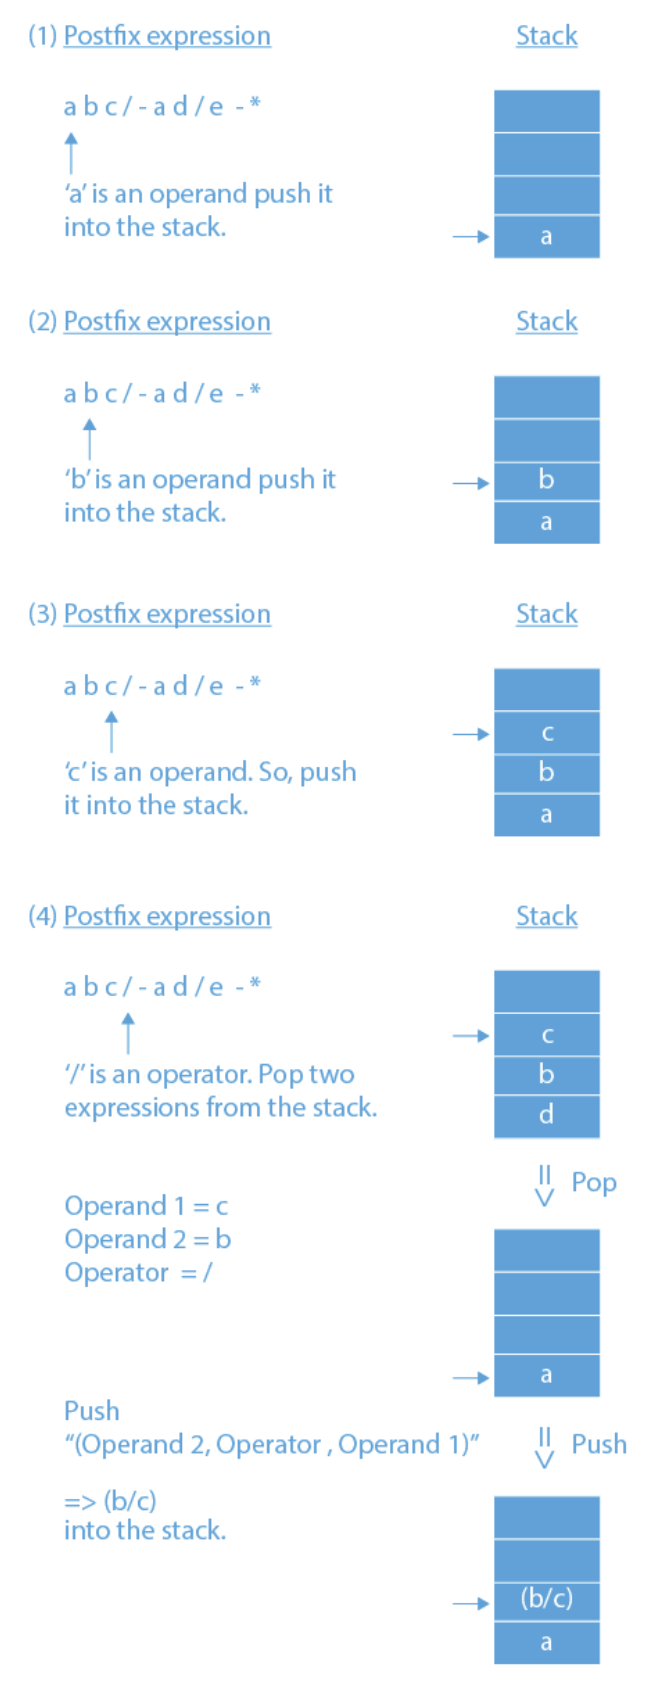

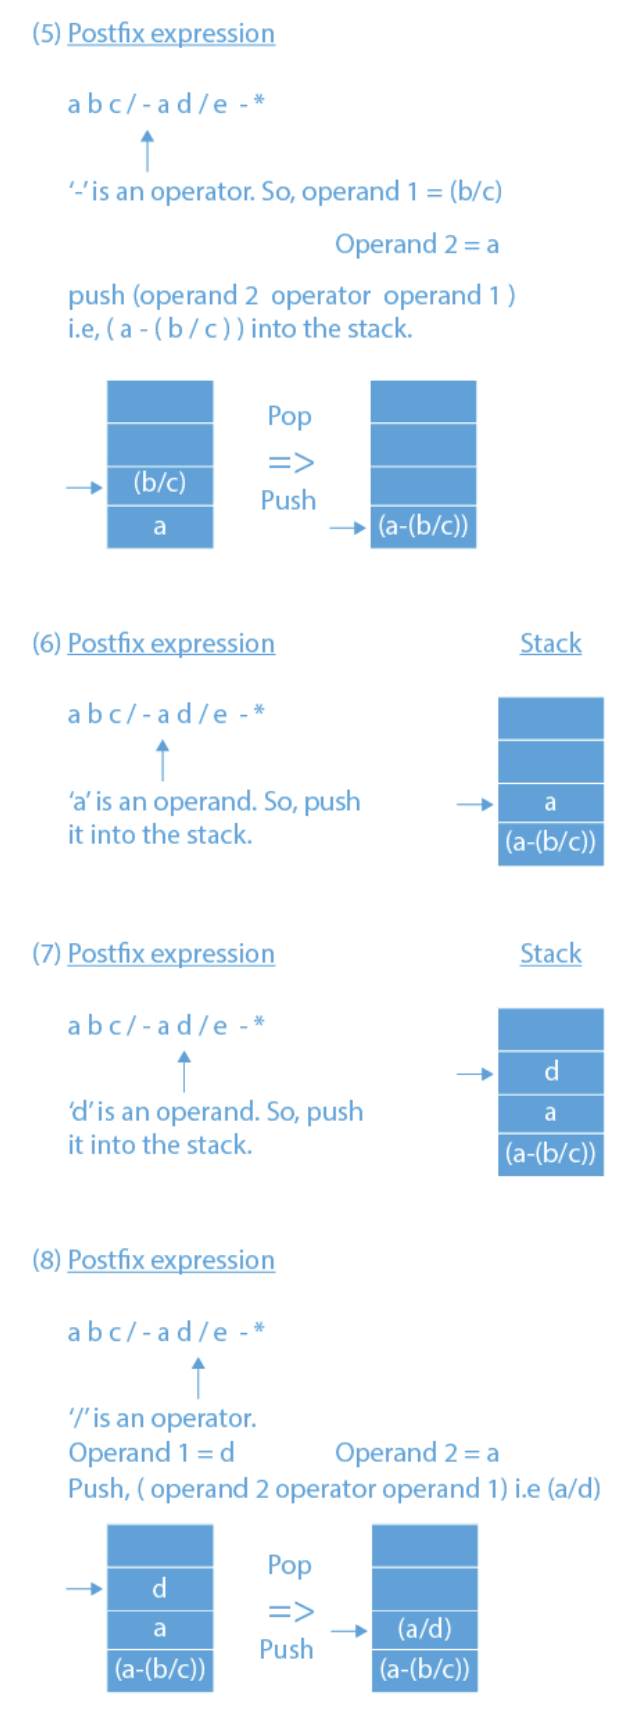

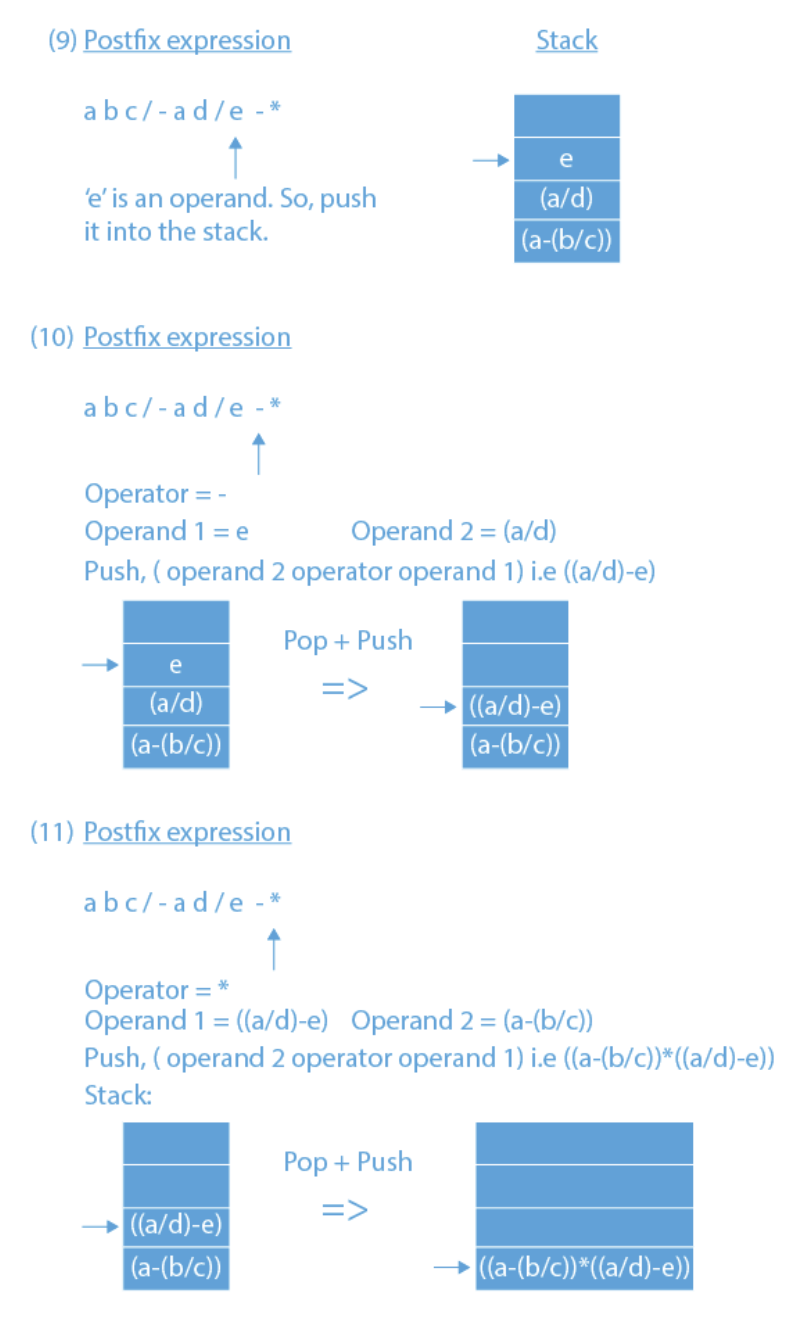


Visualistion link:
- https://www.prepbytes.com/blog/stacks/conversion-of-postfix-expression-to-infix-expression/


- https://www.geeksforgeeks.org/postfix-to-infix/


### Postfix to Infix Conversion Algorithm [Not needed-optional]
### Steps:

1. **Initialize**:
   - Create an empty stack for operands.

2. **Scan the symbols one by one** from left to right in the given postfix expression:

   - **If the symbol is an operand** (i.e., a number or variable):
     - Push it onto the stack.

   - **If the symbol is an operator** (`+`, `-`, `*`, `/`):
     - **Pop two operands** from the stack (let's call them operand1 and operand2).
     - **Apply the operator**: Create a new infix expression in the form: `"(operand2 operator operand1)"`.
     - **Push** the resulting expression back onto the stack.

3. **Stop the process**:
   - Once all symbols have been processed, the final element at the top of the stack will be the required infix expression.

4. **Output**:
   - The infix expression is the string at the top of the stack.


In [ ]:
def postfix_to_infix(postfix):
    # Initialize the stack to hold operands (ListStack)
    stack = ListStack()

    # Iterate over each symbol in the postfix expression
    for symbol in postfix:
        # If the symbol is an operand, push it onto the stack
        if symbol.isalnum():  # Check if it's an operand (e.g., a letter or number)
            stack.push(symbol)

        # If the symbol is an operator, pop two operands from the stack
        elif symbol in '+-*/^':
            operand1 = stack.pop()
            operand2 = stack.pop()
            # Form the infix expression with parentheses
            expression = f"({operand2} {symbol} {operand1})"
            # Push the resulting expression back onto the stack
            stack.push(expression)

    # The final element of the stack is the infix expression
    return stack.pop()

In [ ]:
# Example usage:

postfix_expr = "ABC/-AD/E-*" # example from website
infix_expr = postfix_to_infix(postfix_expr)
print(f"Postfix Expression: {postfix_expr}")
print(f"Infix Expression: {infix_expr}")
print('-'*20)


postfix_expr = "ABC*+DE/-"
infix_expr = postfix_to_infix(postfix_expr)
print(f"Postfix Expression: {postfix_expr}")
print(f"Infix Expression: {infix_expr}")
print('-'*20)

postfix_expr = "AB+CDE/*-F+" # Q9
infix_expr = postfix_to_infix(postfix_expr)
print(f"Postfix Expression: {postfix_expr}")
print(f"Infix Expression: {infix_expr}")
print('-'*20)

postfix_expr = "ABCDE/-*+" # Q10
infix_expr = postfix_to_infix(postfix_expr)
print(f"Postfix Expression: {postfix_expr}")
print(f"Infix Expression: {infix_expr}")
print('-'*20)

Postfix Expression: ABC/-AD/E-*
Infix Expression: ((A - (B / C)) * ((A / D) - E))
--------------------
Postfix Expression: ABC*+DE/-
Infix Expression: ((A + (B * C)) - (D / E))
--------------------
Postfix Expression: AB+CDE/*-F+
Infix Expression: (((A + B) - (C * (D / E))) + F)
--------------------
Postfix Expression: ABCDE/-*+
Infix Expression: (A + (B * (C - (D / E))))
--------------------
